In [1]:
import numpy as np
import pandas as pd

In [4]:
columns_names=["user_id", "item_id", "rating", "timestamp"]

In [6]:
df = pd.read_csv("u.data", sep = "\t",names = columns_names)

In [7]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
movie_titles =pd.read_csv("Movie_Id_Titles")

In [11]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df = pd.merge(df, movie_titles, on = "item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [15]:
import seaborn as sns

In [36]:
sns.set_style("white")

In [22]:
df.groupby("title")["rating"].mean().sort_values(ascending = False).head(10) #top 10 best rated movies

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [21]:
df.groupby("title")["rating"].count().sort_values(ascending = False).head(10)#which movies have the most ratings

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [20]:
df.groupby("title")["rating"].nlargest().head()

title                           
'Til There Was You (1997)  97451    4
                           97447    3
                           97450    3
                           97454    3
                           97449    2
Name: rating, dtype: int64

In [26]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())

In [27]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [34]:
ratings["num_of_ratings"] = df.groupby("title")["rating"].count()

In [37]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


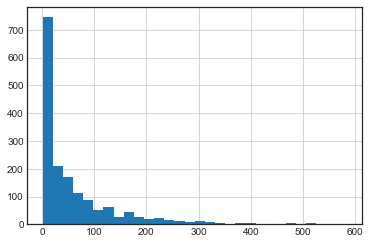

In [38]:
ratings["num_of_ratings"].hist(bins = 30)

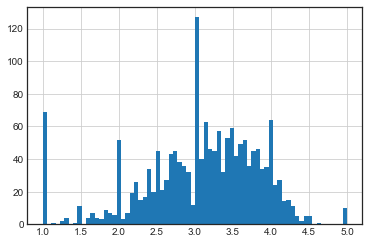

In [39]:
ratings["rating"].hist(bins = 70)

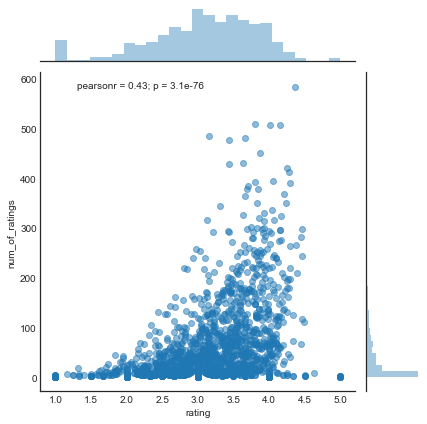

In [41]:
sns.jointplot(x="rating", y="num_of_ratings", data= ratings, alpha= 0.5)

In [42]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [44]:
#in the matrix form
moviemat = df.pivot_table(index ="user_id", columns = "title", values = "rating")

In [45]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
ratings.sort_values("num_of_ratings", ascending = False).head(10)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [48]:
starwars_user_rating = moviemat["Star Wars (1977)"]
lier_lier_User_rating = moviemat["Liar Liar (1997)"]

In [50]:
starwars_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [52]:
similar_to_starwars = moviemat.corrwith(starwars_user_rating)

D:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [53]:
similar_to_liarliar = moviemat.corrwith(lier_lier_User_rating)

D:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [54]:
similar_to_liarliar

title
'Til There Was You (1997)                                   0.118913
1-900 (1994)                                                     NaN
101 Dalmatians (1996)                                       0.469765
12 Angry Men (1957)                                         0.066272
187 (1997)                                                  0.175145
2 Days in the Valley (1996)                                 0.040739
20,000 Leagues Under the Sea (1954)                        -0.027932
2001: A Space Odyssey (1968)                               -0.057864
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.400918
8 1/2 (1963)                                                0.178064
8 Heads in a Duffel Bag (1997)                                   NaN
8 Seconds (1994)                                                 NaN
A Chef in Love (1996)                                       0.000000
Above the Rim (1994)        

In [55]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns= ["Correlation"])
corr_starwars.dropna(inplace=True)

In [59]:
corr_starwars["Correlation"].sort_values(ascending=False).head(10)

title
No Escape (1994)                        1.0
Man of the Year (1995)                  1.0
Hollow Reed (1996)                      1.0
Commandments (1997)                     1.0
Cosi (1996)                             1.0
Stripes (1981)                          1.0
Golden Earrings (1947)                  1.0
Mondo (1996)                            1.0
Line King: Al Hirschfeld, The (1996)    1.0
Outlaw, The (1943)                      1.0
Name: Correlation, dtype: float64

In [61]:
corr_starwars.sort_values("Correlation",ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [62]:
corr_starwars = corr_starwars.join(ratings["num_of_ratings"])#join bc we have the similar index "title"

In [63]:
corr_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [67]:
corr_starwars[corr_starwars["num_of_ratings"]>100].sort_values("Correlation", ascending=False).head()

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [69]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ["Correlation"])
corr_liarliar.dropna(inplace=True)
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [70]:
corr_liarliar = corr_liarliar.join(ratings["num_of_ratings"])

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [72]:
corr_liarliar[corr_liarliar["num_of_ratings"]>100].sort_values("Correlation", ascending=False).head(10)

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
